# Padding

Si nos fijamos, uno de los problemas de hacer las convoluciones como hemos explicado en el tema anterior, es que por ejemplo al primer pixel de la imagen solo se le pasa el filtro una vez

<div style="text-align:center;">
  <img src="Imagenes/Padding01.png" alt="primer pixel"> <!-- style="width:425px;height:626px;"> -->
</div>

Mientras que a uno de los píxeles centrales se le pasa el filtro hasta 9 veces

<div style="text-align:center;">
  <img src="Imagenes/Padding02.png" alt="pixel central"> <!-- style="width:425px;height:626px;"> -->
</div>

Esto va a hacer que la información que aporta el primer pixel tenga menos peso que la del pixel central

Para evitar esto, se añade un padding (relleno) a la imagen, de esta manera se minimiza el problema de la poca información que aportan los píxeles de los bordes.

Por otro lado también hace que la imagen tras aplicar el filtro pueda tener el mismo tamaño que la imagen original

<div style="text-align:center;">
  <img src="Imagenes/Padding03.png" alt="Padding"> <!-- style="width:425px;height:626px;"> -->
</div>

Para que la imagen filtrada tenga el mismo tamaño que la imagen original necesitamos que se cumpla que

$$H-n+1+2p_x = H$$
$$W-m+1+2p_y = W$$

Resolviendo esto nos queda

$$p_x = \frac{n-1}{2}$$
$$p_y = \frac{m-1}{2}$$

En nuestro caso, como el filtro es de 3x3, el padding tiene que ser $p_x = 1$ y $p_y = 1$

Por convenio se suelen rellenar los píxeles de padding con 0s

<div style="text-align:center;">
  <img src="Imagenes/Padding04.png" alt="relleno padding"> <!-- style="width:425px;height:626px;"> -->
</div>

Como hemos dicho, el tamaño del padding tiene que ser 

$$p_x = \frac{n-1}{2}$$
$$p_y = \frac{m-1}{2}$$

Esto hace que sea conveniente usar filtros de tamaño impar, para así tener un tamaño de padding entero. Además al tener filtros de tamaño impar, podemos determinar la posición del filtro como la posición del pixel central del filtro

<div style="text-align:center;">
  <img src="Imagenes/Padding05.png" alt="Posición central del filtro"> <!-- style="width:425px;height:626px;"> -->
</div>

## Padding en Pytorch

Para añadir el padding en Pytorch solo hace falta indicar el valor de padding que queremos mediante el parámetro `padding` de la función `conv2d` que hemos visto en el cuaderno anterior. Vamos a verlo con el mismo ejemplo de antes

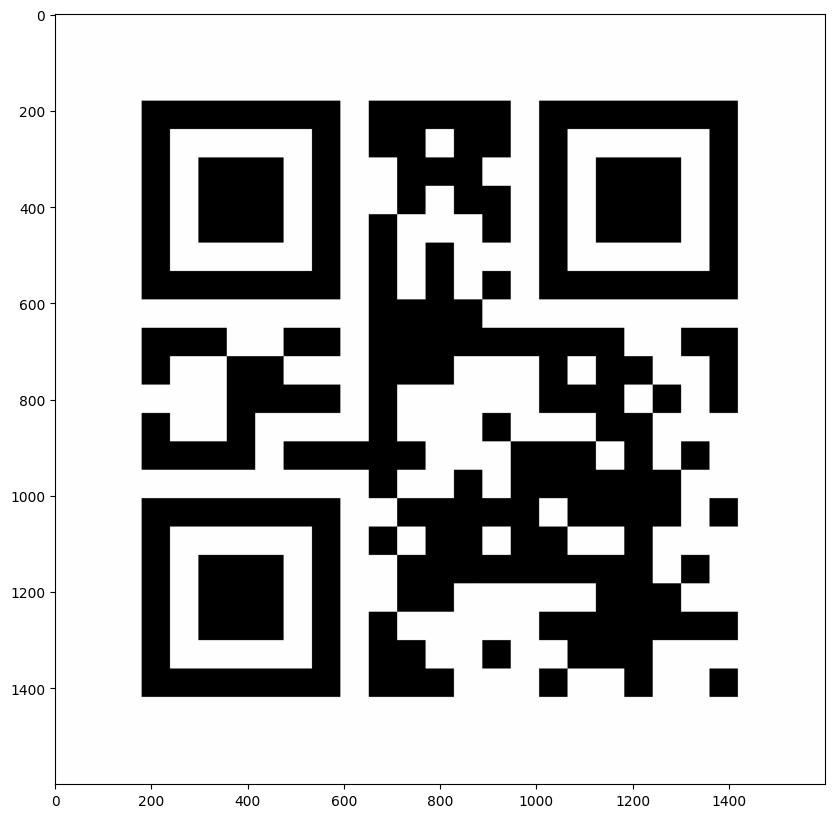

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('Imagenes/qr.png')
fig = plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='gray')
plt.show()

Convertimos la imagen a un tensor

In [2]:
import numpy as np
import torch

array = np.array(img)
tensor = torch.from_numpy(array)
tensor.shape

torch.Size([1600, 1600])

Añadimos el batch size y el número de canales

In [3]:
tensor = tensor.unsqueeze(0).unsqueeze(0).type(torch.float32)
tensor.shape, tensor.dtype

(torch.Size([1, 1, 1600, 1600]), torch.float32)

Definimos el kernell

In [4]:
filter = torch.tensor([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
print(filter)
filter = filter.unsqueeze(0).unsqueeze(0).type(torch.float32)
filter.shape, filter.dtype

tensor([[ 1,  0, -1],
        [ 1,  0, -1],
        [ 1,  0, -1]])


(torch.Size([1, 1, 3, 3]), torch.float32)

Realizamos la convolición con padding y sin padding

In [5]:
import torch.nn.functional as F

tensor_filtered_no_padding = F.conv2d(tensor, filter)
tensor_filtered_padding = F.conv2d(tensor, filter, padding=2)
tensor_filtered_no_padding.shape, tensor_filtered_padding.shape

(torch.Size([1, 1, 1598, 1598]), torch.Size([1, 1, 1602, 1602]))

Como vemos al añadir el pading a la salida tenemos una imagen mayor